# **Archivo 1.json `metadata_sitios`**

## **1. Carga de la base de datos**

In [3]:
import pandas as pd

# Crear el DataFrame
datos = pd.read_json("/content/1.json", lines=True)
datos

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274994 non-null  object 
 1   address           264939 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       13155 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          272740 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             13450 non-null   object 
 10  hours             192448 non-null  object 
 11  MISC              194972 non-null  object 
 12  state             195523 non-null  object 
 13  relative_results  238771 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


In [4]:
# Mostrar los primeros registros
datos.head()


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


## **2. Normalización y limpieza de la columna category**


Dado que nuestro proyecto se enfocará solamente en el rubro de los restaurantes, se procederá a hacer un filtrado de los datos por aquellos que contengan en `category`la palabra `restaurant`.

In [5]:
# Nos asegurarmos de que la columna 'category' sea de tipo string para facilitar la búsqueda
datos['category'] = datos['category'].astype(str)

In [6]:
# Filtramos por aquellos que contengan la palabra "restaurant" sin importar mayúsculas o minúsculas
filtro_restaurant = datos['category'].str.contains('restaurant', case=False, na=False)

# Aplicamos el filtro
datos_restaurant = datos[filtro_restaurant]



In [7]:
# Mostramos los primeros registros filtrados
datos_restaurant.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,['Korean restaurant'],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
6,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,None,33.916402,-118.010855,['Restaurant'],4.5,18,None,"[[Thursday, 11AM–9:30PM], [Friday, 11AM–9:30PM...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 9:30PM,None,https://www.google.com/maps/place//data=!4m2!3...
8,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,None,41.616079,-93.865487,"['Bakery', 'Health food restaurant']",4.7,21,None,"[[Thursday, 10AM–5:30PM], [Friday, 10AM–5:30PM...",{'Service options': ['Delivery']},Permanently closed,"[0x87ee974869295555:0x95f310d065882c9b, 0x87ec...",https://www.google.com/maps/place//data=!4m2!3...
68,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,"Bubble tea shop offering hot & cold versions, ...",39.940293,-75.150923,['Restaurant'],4.0,8,None,None,"{'Service options': ['Delivery'], 'Amenities':...",None,"[0x89c6c62a40f4b733:0x73bfeec1898f272b, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...
96,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,None,21.637796,-157.920714,['Restaurant'],4.4,18,None,"[[Thursday, 11AM–8PM], [Friday, 11AM–8PM], [Sa...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"[0x7c00451360f80cf1:0x930291a38bab3132, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...


In [8]:
datos_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10978 entries, 2 to 274964
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10978 non-null  object 
 1   address           10913 non-null  object 
 2   gmap_id           10978 non-null  object 
 3   description       2388 non-null   object 
 4   latitude          10978 non-null  float64
 5   longitude         10978 non-null  float64
 6   category          10978 non-null  object 
 7   avg_rating        10978 non-null  float64
 8   num_of_reviews    10978 non-null  int64  
 9   price             2861 non-null   object 
 10  hours             9182 non-null   object 
 11  MISC              10852 non-null  object 
 12  state             9228 non-null   object 
 13  relative_results  7089 non-null   object 
 14  url               10978 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 1.3+ MB


## 3. **Análisis de valores nulos**

In [9]:
# Porcentaje de valores nulos por columna
porcentaje_nulos = datos_restaurant.isnull().mean() * 100
print(porcentaje_nulos)


name                 0.000000
address              0.592093
gmap_id              0.000000
description         78.247404
latitude             0.000000
longitude            0.000000
category             0.000000
avg_rating           0.000000
num_of_reviews       0.000000
price               73.938787
hours               16.359993
MISC                 1.147750
state               15.940973
relative_results    35.425396
url                  0.000000
dtype: float64


**Columnas sin valores nulos**

- Las columnas `name`, `gmap_id`, `latitude`, `longitude`, `category`, `avg_rating`, `num_of_reviews`, y `url` no tienen valores nulos.


**Columnas con bajo porcentaje de nulos (menos del $2\%$)**

- Las columnas `address` ($0.59\%$ nulos) y `MISC` ($1.14\%$ nulos) tienen un bajo porcentaje de valores faltantes.



**Columnas con valores nulos moderados (entre $15\%$ y $35\%$)**

- `hours` tiene un poco más del $16\%$ en valores faltantes, estos restaurantes no tienen horarios disponibles. Esto puede ser significativo si necesitamos trabajar con datos relacionados con las horas de operación.

- `state` tiene un $15.9\%$ de valores faltantes, estos restaurantes no tienen información de estado.

- Más de un tercio de la columna `relative_results` tiene valores nulos. Debemos evaluar la relevancia de esta variable en el análisis.

**Columnas con alto porcentaje de nulos (más del $70\%$)**

- Una gran cantidad de restaurantes carecen de descripciones, se tiene un $78.25\%$ nulos.

- Casi el 74% de los registros no tienen información sobre los precios (`price`).

In [10]:
#Eliminamos las columnas description y price

datos_restaurant = datos_restaurant.drop(['description', 'price'], axis=1)


Utilizaremos el método `duplicated()` para encontrar las filas duplicadas y contar cuántas hay.

In [11]:
# Revisar los tipos de datos en cada columna
datos_restaurant.head()


,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,state,relative_results,url
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,['Korean restaurant'],4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
6,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,['Restaurant'],4.5,18,"[[Thursday, 11AM–9:30PM], [Friday, 11AM–9:30PM...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 9:30PM,None,https://www.google.com/maps/place//data=!4m2!3...
8,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,41.616079,-93.865487,"['Bakery', 'Health food restaurant']",4.7,21,"[[Thursday, 10AM–5:30PM], [Friday, 10AM–5:30PM...",{'Service options': ['Delivery']},Permanently closed,"[0x87ee974869295555:0x95f310d065882c9b, 0x87ec...",https://www.google.com/maps/place//data=!4m2!3...
68,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,['Restaurant'],4.0,8,None,"{'Service options': ['Delivery'], 'Amenities':...",None,"[0x89c6c62a40f4b733:0x73bfeec1898f272b, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...
96,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,21.637796,-157.920714,['Restaurant'],4.4,18,"[[Thursday, 11AM–8PM], [Friday, 11AM–8PM], [Sa...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"[0x7c00451360f80cf1:0x930291a38bab3132, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...


In [12]:
# Filtrar todas las filas donde 'name' es 'Pizza Hut Express'
filtrado_pizza_hut_express = datos_restaurant[datos_restaurant['name'] == "Pizza Hut Express"]

# Mostrar las filas filtradas
filtrado_pizza_hut_express



,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,state,relative_results,url
8580,Pizza Hut Express,"Pizza Hut Express, 1824 E Ridge Pike, Royersfo...",0x89c69a9bd30e31cb:0xc124159523488a00,40.210468,-75.497948,"['Pizza restaurant', 'Takeout Restaurant']",2.1,13,None,"{'Service options': ['Delivery', 'Takeout'], '...",None,"[0x89c686f4295f261d:0x634c8e9cd8ee2d00, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...
13692,Pizza Hut Express,"Pizza Hut Express, 100 Grand Hill Pl, Holly Sp...",0x89ac921cfbf010e9:0xbb65f5da7dc3a1c1,35.660726,-78.852024,"['Pizza restaurant', 'Pizza Takeout']",3.0,5,None,"{'Service options': ['Curbside pickup', 'Deliv...",None,"[0x89ac8e0094e519f1:0xfdc1758495f46272, 0x89ac...",https://www.google.com/maps/place//data=!4m2!3...
35153,Pizza Hut Express,"Pizza Hut Express, 1824 E Ridge Pike, Royersfo...",0x89c69a9bd30e31cb:0xc124159523488a00,40.210468,-75.497948,"['Pizza restaurant', 'Takeout Restaurant']",2.1,13,None,"{'Service options': ['Delivery', 'Takeout'], '...",None,"[0x89c686f4295f261d:0x634c8e9cd8ee2d00, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...
40265,Pizza Hut Express,"Pizza Hut Express, 100 Grand Hill Pl, Holly Sp...",0x89ac921cfbf010e9:0xbb65f5da7dc3a1c1,35.660726,-78.852024,"['Pizza restaurant', 'Pizza Takeout']",3.0,5,None,"{'Service options': ['Curbside pickup', 'Deliv...",None,"[0x89ac8e0094e519f1:0xfdc1758495f46272, 0x89ac...",https://www.google.com/maps/place//data=!4m2!3...
61133,Pizza Hut Express,"Pizza Hut Express, 4000 Monument Rd, Philadelp...",0x89c6b882bb78c94f:0x21ad6b407cd4a3ce,40.006486,-75.211830,['Pizza restaurant'],3.0,5,None,"{'Service options': ['Takeout', 'Delivery'], '...",None,"[0x89c6c675ced5069f:0x46543ed06fe2ee6e, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...
61158,Pizza Hut Express,"Pizza Hut Express, 2971 Moose Trail, Elkhart, ...",0x8816dc7d87813da9:0x4730d4515e48fc79,41.731202,-86.004997,['Pizza restaurant'],2.0,3,None,"{'Service options': ['Delivery'], 'Offerings':...",None,"[0x8816c35cfc2a7961:0x3fbda9b8d3a7f8cf, 0x8816...",https://www.google.com/maps/place//data=!4m2!3...
62373,Pizza Hut Express,"Pizza Hut Express, 579 Grand Army of the Repub...",0x89e457e8f97dfdd7:0xd6f82ec8f348d88d,41.748769,-71.208146,"['Pizza restaurant', 'Pizza Takeout']",4.3,3,None,"{'Service options': ['Curbside pickup', 'Deliv...",None,"[0x89e457cc060417bb:0xad9d82afb71f58f8, 0x89e4...",https://www.google.com/maps/place//data=!4m2!3...
67567,Pizza Hut Express,"Pizza Hut Express, 2000 SW College Rd, Ocala, ...",0x88e7d4c5b751c41d:0xca8ed443fc4d8ef8,29.174318,-82.156683,"['Pizza restaurant', 'Pizza Takeout']",4.2,8,None,"{'Service options': ['Curbside pickup', 'Deliv...",None,"[0x88e7d4dc71cce8b1:0x3a7ae4158e261f55, 0x88e7...",https://www.google.com/maps/place//data=!4m2!3...
70297,Pizza Hut Express,"Pizza Hut Express, 12701 Farm to Market 1960 R...",0x8640d1098ab77057:0x39f541ec45a4125c,29.918607,-95.605052,"['Pizza restaurant', 'Pizza Takeout']",3.6,8,None,"{'Service options': ['Curbside pickup', 'Deliv...",None,"[0x8640d222f8441277:0x8d7b4b517fb26429, 0x8640...",https://www.google.com/maps/place//data=!4m2!3...
71201,Pizza Hut Express,"Pizza Hut Express, 3000 E Highland Dr, Jonesbo...",0x87d42c0860358643:0x898f13f13c4dea94,35.823279,-90.666528,"['Pizza restaurant', 'Pizza Takeout']",2.6,5,"[[Tuesday, 8AM–10PM], [Wednesday, 8AM–10PM], [...","{'Service options': ['Curbside pickup', 'Deliv...",Closed ⋅ Opens 8AM,"[0x87d42bfd8a1155f1:0x514e7af9ace6dbd3, 0x87d4...",https://www.google.com/maps/place//data=!4m2!3...


## 4. **Tipos de datos del DataFrame**

In [13]:
# Verificamos los tipos de datos en cada columna
print(datos_restaurant.dtypes)


name                 object
address              object
gmap_id              object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object


In [14]:
datos_restaurant.head()



,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,state,relative_results,url
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,['Korean restaurant'],4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
6,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,['Restaurant'],4.5,18,"[[Thursday, 11AM–9:30PM], [Friday, 11AM–9:30PM...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 9:30PM,None,https://www.google.com/maps/place//data=!4m2!3...
8,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,41.616079,-93.865487,"['Bakery', 'Health food restaurant']",4.7,21,"[[Thursday, 10AM–5:30PM], [Friday, 10AM–5:30PM...",{'Service options': ['Delivery']},Permanently closed,"[0x87ee974869295555:0x95f310d065882c9b, 0x87ec...",https://www.google.com/maps/place//data=!4m2!3...
68,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,['Restaurant'],4.0,8,None,"{'Service options': ['Delivery'], 'Amenities':...",None,"[0x89c6c62a40f4b733:0x73bfeec1898f272b, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...
96,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,21.637796,-157.920714,['Restaurant'],4.4,18,"[[Thursday, 11AM–8PM], [Friday, 11AM–8PM], [Sa...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"[0x7c00451360f80cf1:0x930291a38bab3132, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...


Las columnas `category` y `hours` son listas, la columna `MISC` contiene diccionarios, lo tendremos en cuenta en caso de necesitar estas columnas para el análisis.

## **5. Distribución de variables numéricas**

### **5.1. Visualización de las variables numéricas**

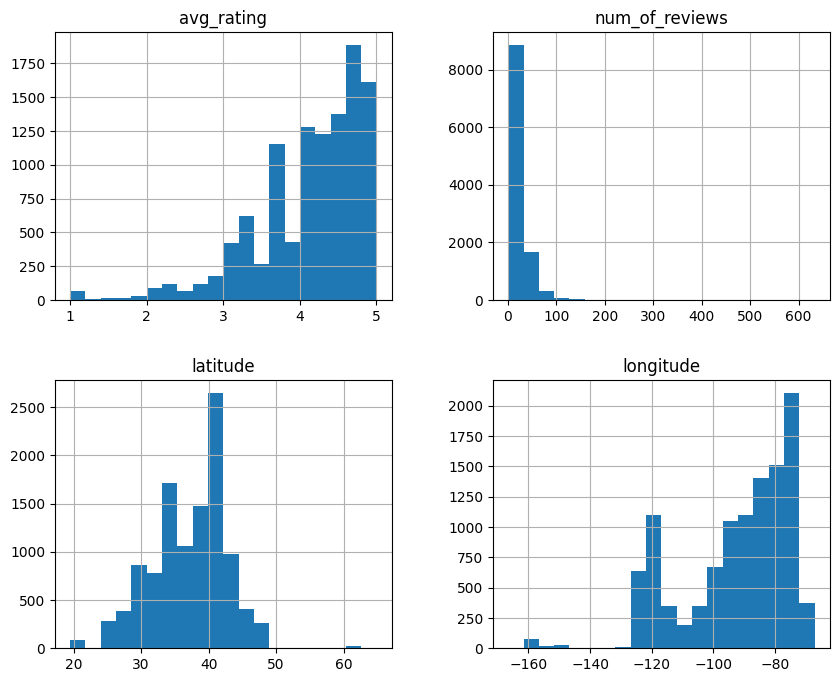

In [15]:
import matplotlib.pyplot as plt

# Visualizamos la distribución de las variables numéricas
datos_restaurant[['avg_rating', 'num_of_reviews', 'latitude', 'longitude']].hist(bins=20, figsize=(10, 8))

# Mostramos el gráfico
plt.show()


**avg_rating (Calificación promedio)**

La mayoría de los restaurantes tienen calificaciones entre $3.5$ y $5$, lo cual es un rango alto.

Se observa una concentración significativa de restaurantes con calificaciones cercanas a $5$, lo que indica que muchos restaurantes reciben altas puntuaciones.

Hay pocos valores con calificaciones bajas (por debajo de $3$), lo que podría sugerir una posible tendencia hacia calificaciones más positivas o un sesgo en los datos.

**num_of_reviews (Número de reseñas)**

La mayoría de los restaurantes tienen pocas reseñas, con un pico notable en la categoría de $0$ a $50$ reseñas.

Existen algunos valores más altos, lo que sugiere que hay unos pocos restaurantes muy populares con muchas reseñas.

Esta distribución está muy sesgada hacia la izquierda, lo cual es común en este tipo de datos, ya que es más frecuente que los restaurantes tengan pocas reseñas.

**latitude (Latitud)**

La mayoría de los valores de latitud se agrupan entre $30$ y $40$, lo que parece representar una concentración geográfica en esa región.

Hay algunos valores dispersos fuera de este rango (especialmente por encima de $60$), lo que podría representar ubicaciones geográficas incorrectas o fuera de los rangos normales para los restaurantes en los datos.

**longitude (Longitud)**

Los valores de longitud se agrupan principalmente entre $-130$ y $-70$, lo cual es coherente con ubicaciones en América del Norte.

También hay algunos valores fuera de este rango, lo que nuevamente podría indicar errores en los datos geográficos o restaurantes en ubicaciones poco comunes.

### **5.2. Análisis Descriptivo Básico**

In [16]:
estadisticas = datos_restaurant.describe()
print(estadisticas)


           latitude     longitude    avg_rating  num_of_reviews
count  10978.000000  10978.000000  10978.000000    10978.000000
mean      37.241009    -92.309657      4.118911       20.193296
std        5.468386     17.491500      0.729564       25.828715
min       19.503497   -166.552444      1.000000        1.000000
25%       33.661076   -102.532480      3.800000        7.000000
50%       38.272078    -87.587709      4.300000       14.000000
75%       40.899755    -78.178811      4.700000       27.000000
max       64.849902    -67.174437      5.000000      633.000000


**`avg_rating`**

---



**Rango:** Las calificaciones promedio van desde $1.0$ hasta $5.0$, cubriendo el rango completo de calificaciones posibles.

**Media:** La media es $4.12$, lo que indica que la mayoría de las calificaciones tienden a ser positivas.

**Percentiles:** El $50\%$ de los datos (mediana) es $4.3$, lo que refuerza la tendencia de que las calificaciones suelen ser altas.

El percentil $25\%$ es $3.8$ y el percentil $75\%$ es $4.7$, lo que significa que la mayoría de las calificaciones están concentradas entre estos dos valores.

**Dispersión:** La desviación estándar es $0.73$, lo que indica una dispersión moderada alrededor de la media.

**`num_of_reviews`**

**Rango:** El número de reseñas varía entre $1$ y $633$, mostrando que algunos negocios tienen pocas reseñas, mientras que otros son muy populares.

**Media:** El promedio de reseñas es $20.19$, lo que significa que, en promedio, cada lugar tiene aproximadamente $20$ reseñas.

**Percentiles:** El $25\%$ de los lugares tiene $7$ o menos reseñas, el $50\%$ tiene $14$ reseñas, y el $75\%$ tiene $27$ reseñas. Esto sugiere que la mayoría de los negocios tienen menos de $27$ reseñas, pero hay una minoría con un número mucho mayor de reseñas, como se ve en el valor máximo de $633$.

**Dispersión:** La desviación estándar es $25.83$, lo que indica una alta variabilidad en el número de reseñas. Algunos lugares tienen muchas reseñas, pero la mayoría tiene un número más bajo.

### **5.3. Distribución de los Datos**

<Axes: >

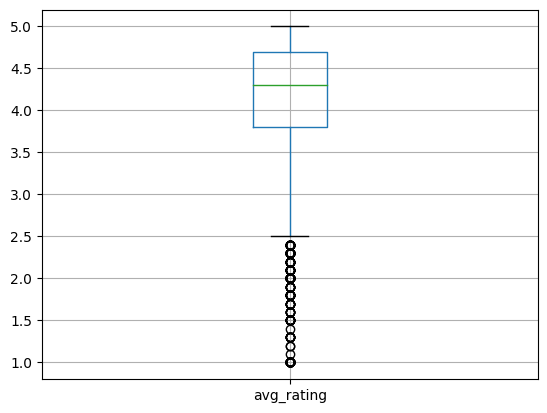

In [20]:
datos_restaurant.boxplot(column='avg_rating')



La gráfica es un boxplot que muestra la distribución de las calificaciones promedio (`avg_rating`). La línea verde dentro de la caja representa la mediana, que está alrededor de $4.3$. Esto indica que el $50\%$ de los valores de calificación promedio son mayores o iguales a $4.3$.

La caja azul es el rango intercuartil $IQR$, el cual no es demasiado amplio, lo que sugiere que las calificaciones son relativamente consistentes y altas.Esta caja representa el rango entre el percentil $25\%$ ($Q_1$) y el percentil $75\%$ ($Q_3$), lo que corresponde a calificaciones entre aproximadamente $3.8$ y $4.7$. Esto muestra que la mayoría de las calificaciones promedio están concentradas en este rango.

Los círculos por debajo del valor mínimo (alrededor de $1.0$ a $2.5$) representan valores atípicos. Estos son casos donde las calificaciones son significativamente menores que el resto de los datos. Estos valores atípicos pueden representar lugares con malas experiencias o una pequeña cantidad de reseñas negativas que bajan su calificación promedio.

La línea inferior (bigote) llega hasta alrededor de $2.5$, que es el valor mínimo que no se considera un outlier. Esto significa que el valor más bajo (sin considerar los atípicos) es $2.5$.
El bigote superior se extiende hasta $5.0$, que es la calificación máxima posible.

<Axes: >

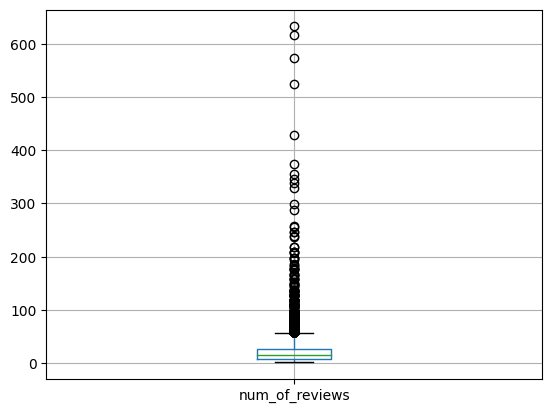

In [22]:
datos_restaurant.boxplot(column='num_of_reviews')

La línea dentro de la caja azul representa la mediana del número de reseñas, que está alrededor de $14$. Esto indica que el $50\%$ de los restaurantes tienen $14$ reseñas o menos.

La caja azul muestra el rango entre el percentil $25\%$ y el percentil $75\%$, lo que corresponde a un número de reseñas entre aproximadamente $7$ y $27$. Esto indica que la mayoría de los restaurantes tienen un número de reseñas concentrado en este rango relativamente bajo.
El rango intercuartil es bastante estrecho, lo que sugiere que la mayoría de los restaurantes reciben un número moderado de reseñas.

Los círculos por encima del bigote superior representan valores atípicos, que son casos con un número de reseñas significativamente más alto. Algunos de estos outliers tienen más de $600$ reseñas, lo cual es mucho más alto que la mayoría de los restaurantes.

La cantidad de outliers es bastante grande, lo que sugiere que algunos restaurantes son mucho más populares o reciben más atención que otros. Esto puede estar relacionado con factores como la ubicación o la popularidad de los restaurantes.

### **5.4. Análisis de la Dispersión**

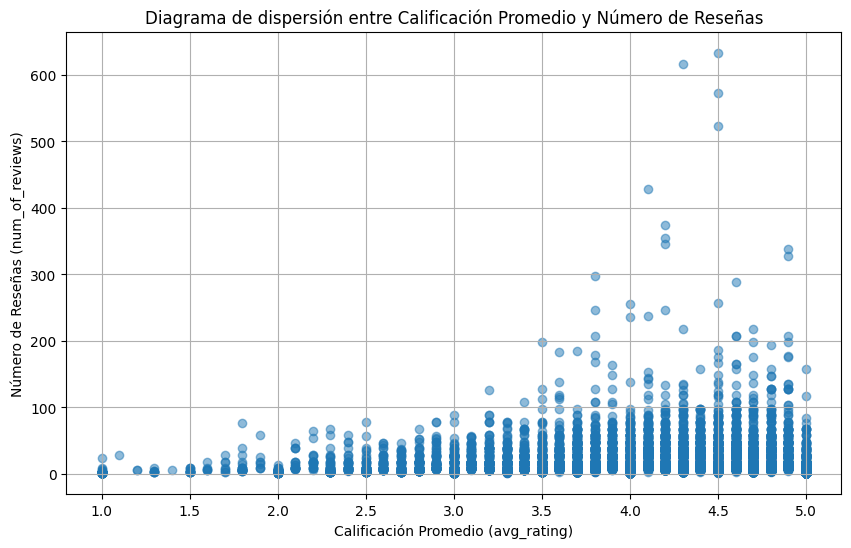

In [32]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.scatter(datos_restaurant['avg_rating'], datos_restaurant['num_of_reviews'], alpha=0.5)
plt.title('Diagrama de dispersión entre Calificación Promedio y Número de Reseñas')
plt.xlabel('Calificación Promedio (avg_rating)')
plt.ylabel('Número de Reseñas (num_of_reviews)')
plt.grid(True)
plt.show()



El gráfico que hemos generado es un diagrama de dispersión que muestra la relación entre la calificación promedio (`avg_rating`) y el número de reseñas (`num_of_reviews`). No parece haber una correlación lineal clara entre el número de reseñas y la calificación promedio.

La mayoría de los puntos están agrupados entre $3.0$ y $5.0$ en el eje de las calificaciones, lo que confirma que la mayoría de los restaurantes tienen calificaciones buenas, aunque el número de reseñas varía considerablemente.

Los puntos con muchas reseñas (por encima de $300$) se concentran mayoritariamente en las calificaciones más altas (por encima de $4.0$), lo que puede indicar que los restaurantes más populares tienden a recibir buenas calificaciones.

Los restaurantes con calificaciones más bajas (alrededor de $1.0$ y $2.0$) tienden a tener muy pocas reseñas. Esto podría significar que los restaurantes con malas calificaciones no son tan frecuentemente evaluados o son menos conocidos.

Hay una gran cantidad de puntos alrededor de las calificaciones entre $4.0$ y $4.5$, lo que sugiere que la mayoría de los restaurantes tienen calificaciones positivas. Sin embargo, no todos los restaurantes con buenas calificaciones tienen muchas reseñas. Esto se observa en la dispersión de los puntos a lo largo del eje vertical, indicando que tanto los restaurantes muy populares como los menos conocidos pueden recibir buenas calificaciones.